# Regression

In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# Load the data
data = pd.read_excel(r"C:\Users\Ruslan\Desktop\DataCity - Python\Final Project\regression_excel.xlsx")
data

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800.0
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900.0
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900.0
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100.0


In [3]:
data.shape

(39644, 60)

In [4]:
raw_data = data.copy()

## Preprocessing

In [5]:
# Clean unnecessary space from column names
raw_data.columns = raw_data.columns.str.replace(' ', '')

In [6]:
raw_data.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [7]:
raw_data.dtypes

timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length              object
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                        object
kw_avg_min                        object
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg      

In [8]:
obj_df = raw_data.select_dtypes(include = ['object']).copy()
for i in obj_df.columns:
    obj_df[i] = pd.to_numeric(obj_df.loc[:,i], errors='coerce')

In [9]:
obj_df.dtypes

average_token_length    float64
kw_max_min              float64
kw_avg_min              float64
dtype: object

In [10]:
# bunu qisa yollada yazmaq olardi
raw_data['average_token_length'] = obj_df['average_token_length']

In [11]:
raw_data['kw_max_min'] = obj_df['kw_max_min']

In [12]:
raw_data['kw_avg_min'] = obj_df['kw_avg_min']

In [13]:
raw_data.loc[:, ['average_token_length', 'kw_max_min', 'kw_avg_min']]

,average_token_length,kw_max_min,kw_avg_min
0,4.680365e+09,0.0,0.00
1,4.913725e+08,0.0,0.00
2,4.393365e+09,0.0,0.00
3,4.404896e+09,0.0,0.00
4,4.682836e+09,0.0,0.00
...,...,...,...
39639,4.523121e+09,671.0,173125.00
39640,4.405488e+09,616.0,184.00
39641,5.076923e+09,691.0,168.25
39642,4.975073e+09,0.0,-1.00


In [14]:
# Exploring the descriptive statistics
raw_data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39634.000000,39634.000000,39634.000000,39634.000000,39634.000000,39634.000000,39634.000000,39634.000000,39634.000000,39634.000000,...,39634.000000,39634.000000,39634.000000,39634.000000,39634.000000,39634.000000,39634.000000,39634.000000,39634.000000,39634.000000
mean,354.545844,10.399001,546.493238,0.548208,0.996468,0.689167,10.880204,3.292274,4.544558,1.246985,...,0.095446,0.756707,-0.259509,-0.521934,-0.107493,0.282367,0.071435,0.341846,0.156075,3395.331357
std,214.177045,2.114134,471.113291,3.521152,5.231891,3.265228,11.313043,3.847909,8.310051,4.082227,...,0.071319,0.247782,0.127728,0.290309,0.095378,0.324256,0.265465,0.188784,0.226307,11628.241516
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470852,1.000000,0.625720,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328333,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754627,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,75.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [15]:
# Dealing with missing values
raw_data.isnull().sum()

timedelta                         10
n_tokens_title                    10
n_tokens_content                  10
n_unique_tokens                   10
n_non_stop_words                  10
n_non_stop_unique_tokens          10
num_hrefs                         10
num_self_hrefs                    10
num_imgs                          10
num_videos                        10
average_token_length              59
num_keywords                      10
data_channel_is_lifestyle         10
data_channel_is_entertainment     10
data_channel_is_bus               10
data_channel_is_socmed            10
data_channel_is_tech              10
data_channel_is_world             10
kw_min_min                        10
kw_max_min                       120
kw_avg_min                       260
kw_min_max                        10
kw_max_max                        10
kw_avg_max                        10
kw_min_avg                        10
kw_max_avg                        10
kw_avg_avg                        10
s

In [16]:
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,...,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000
mean,356.712061,10.391847,546.559309,0.548544,0.997119,0.689516,10.899432,3.296913,4.551839,1.235068,...,0.095486,0.757211,-0.259269,-0.521511,-0.107426,0.282356,0.071804,0.341750,0.156151,3401.201239
std,213.919957,2.113090,471.233107,3.539332,5.258898,3.282062,11.317151,3.851322,8.306328,4.055979,...,0.071383,0.247346,0.127552,0.290087,0.095177,0.324165,0.265410,0.188814,0.226306,11676.846548
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,168.000000,9.000000,246.000000,0.470801,1.000000,0.625704,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.327956,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,947.000000
50%,343.000000,10.000000,409.000000,0.539267,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253045,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,545.000000,12.000000,716.000000,0.608696,1.000000,0.754638,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186591,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,20.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,75.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [17]:
data_no_mv.isnull().sum()

timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_s

In [18]:
data_no_mv.shape

(39227, 60)

In [19]:
rep = data_no_mv.iloc[:,2:6].replace(0, np.mean(data_no_mv.iloc[:,2:6]))

In [20]:
data_no_mv.iloc[:,2:6] = rep

C:\Users\Ruslan\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-20-6e19e730eea4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv.iloc[:,2:6] = rep


In [21]:
data_no_mv.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,...,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000
mean,356.712061,10.391847,562.638271,0.564682,1.026453,0.709800,10.899432,3.296913,4.551839,1.235068,...,0.095486,0.757211,-0.259269,-0.521511,-0.107426,0.282356,0.071804,0.341750,0.156151,3401.201239
std,213.919957,2.113090,461.534150,3.538044,5.256035,3.279868,11.317151,3.851322,8.306328,4.055979,...,0.071383,0.247346,0.127552,0.290087,0.095177,0.324165,0.265410,0.188814,0.226306,11676.846548
min,8.000000,2.000000,18.000000,0.114964,0.997119,0.119134,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,168.000000,9.000000,264.000000,0.479350,1.000000,0.634668,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.327956,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,947.000000
50%,343.000000,10.000000,436.000000,0.547206,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253045,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,545.000000,12.000000,716.000000,0.608696,1.000000,0.754638,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186591,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,20.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,75.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [22]:
data_no_mv.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [23]:
rep1 = data_no_mv.loc[:,'self_reference_min_shares':'self_reference_avg_sharess']

In [24]:
rep1 = rep1.replace(0, np.mean(rep1))

In [25]:
rep1.describe()

,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess
count,39227.000000,39227.000000,3.922700e+04
mean,4717.527007,12178.703993,4.420103e+08
std,19461.724377,40461.827136,1.308121e+09
min,1.000000,4.000000,4.000000e+00
25%,1000.000000,2200.000000,2.000000e+03
50%,2000.000000,5800.000000,5.427000e+03
75%,3993.319780,10308.877941,3.741554e+08
max,843300.000000,843300.000000,9.998333e+09


In [26]:
data_no_mv.loc[:,'self_reference_min_shares':'self_reference_avg_sharess'] = rep1

C:\Users\Ruslan\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-26-273320c5ab91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv.loc[:,'self_reference_min_shares':'self_reference_avg_sharess'] = rep1


In [27]:
data_no_mv.loc[:,'self_reference_min_shares':'self_reference_avg_sharess']

,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess
0,496.00000,496.000000,4.960000e+02
1,3993.31978,10308.877941,3.741554e+08
2,918.00000,918.000000,9.180000e+02
3,3993.31978,10308.877941,3.741554e+08
4,545.00000,16000.000000,3.151158e+09
...,...,...,...
39638,2000.00000,5700.000000,3.633333e+09
39639,11400.00000,48000.000000,3.703333e+09
39640,2100.00000,2100.000000,2.100000e+03
39641,1400.00000,1400.000000,1.400000e+03


In [28]:
rep2 = data_no_mv.loc[:,'global_subjectivity':'abs_title_sentiment_polarity']

In [29]:
rep2.describe()

,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000
mean,0.443608,0.119616,0.039665,0.016602,0.682721,0.287733,0.354013,0.095486,0.757211,-0.259269,-0.521511,-0.107426,0.282356,0.071804,0.341750,0.156151
std,0.116404,0.096946,0.017411,0.010817,0.189866,0.156136,0.104312,0.071383,0.247346,0.127552,0.290087,0.095177,0.324165,0.265410,0.188814,0.226306
min,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.396326,0.058083,0.028436,0.009615,0.600000,0.185185,0.306414,0.050000,0.600000,-0.327956,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,0.453564,0.119473,0.039049,0.015326,0.711111,0.279070,0.358780,0.100000,0.800000,-0.253045,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000
75%,0.508383,0.178126,0.050314,0.021739,0.800000,0.384615,0.411502,0.100000,1.000000,-0.186591,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,1.000000,0.727841,0.155488,0.184932,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


In [30]:
rep2 = rep2.replace(0, np.mean(rep2))

In [31]:
rep2.describe()

,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,3.922700e+04
mean,0.456692,0.123183,0.040867,0.017668,0.703414,0.306196,0.364743,0.098380,0.780162,-0.275905,-0.554973,-0.114319,0.410624,0.107863,0.364480,2.345666e-01
std,0.087030,0.094652,0.015938,0.009909,0.146603,0.136840,0.083469,0.069360,0.208023,0.108071,0.256084,0.090943,0.228936,0.257978,0.165427,1.811640e-01
min,0.022222,-0.393750,0.002137,0.000402,0.028986,0.006993,0.033333,0.033333,0.033333,-1.000000,-1.000000,-1.000000,0.022222,-1.000000,0.001818,9.250000e-18
25%,0.404563,0.067163,0.029891,0.011166,0.616745,0.211460,0.313910,0.050000,0.600000,-0.327956,-0.700000,-0.125000,0.282356,0.071804,0.200000,1.561508e-01
50%,0.453564,0.119616,0.039665,0.016602,0.711111,0.287733,0.358780,0.100000,0.800000,-0.259269,-0.500000,-0.100000,0.282356,0.071804,0.500000,1.561508e-01
75%,0.508383,0.178126,0.050314,0.021739,0.800000,0.384615,0.411502,0.100000,1.000000,-0.204167,-0.400000,-0.050000,0.500000,0.150000,0.500000,2.500000e-01
max,1.000000,0.727841,0.155488,0.184932,1.000000,1.000000,1.000000,1.000000,1.000000,-0.012500,-0.012500,-0.008333,1.000000,1.000000,0.500000,1.000000e+00


In [32]:
data_no_mv.loc[:,'global_subjectivity':'abs_title_sentiment_polarity'] = rep2

C:\Users\Ruslan\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-32-a6ff6e2b8be9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_mv.loc[:,'global_subjectivity':'abs_title_sentiment_polarity'] = rep2


In [33]:
data_no_mv.loc[:,'global_subjectivity':'abs_title_sentiment_polarity']

,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.341750,0.187500
1,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.282356,0.071804,0.500000,0.156151
2,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.282356,0.071804,0.500000,0.156151
3,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.282356,0.071804,0.500000,0.156151
4,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39638,0.552041,0.268878,0.031390,0.004484,0.875000,0.125000,0.573469,0.214286,0.80,-0.250000,-0.250,-0.250000,0.282356,0.071804,0.500000,0.156151
39639,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.071804,0.400000,0.156151
39640,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364


In [34]:
data_no_mv.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,...,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,39227.000000,3.922700e+04,39227.000000
mean,356.712061,10.391847,562.638271,0.564682,1.026453,0.709800,10.899432,3.296913,4.551839,1.235068,...,0.098380,0.780162,-0.275905,-0.554973,-0.114319,0.410624,0.107863,0.364480,2.345666e-01,3401.201239
std,213.919957,2.113090,461.534150,3.538044,5.256035,3.279868,11.317151,3.851322,8.306328,4.055979,...,0.069360,0.208023,0.108071,0.256084,0.090943,0.228936,0.257978,0.165427,1.811640e-01,11676.846548
min,8.000000,2.000000,18.000000,0.114964,0.997119,0.119134,0.000000,0.000000,0.000000,0.000000,...,0.033333,0.033333,-1.000000,-1.000000,-1.000000,0.022222,-1.000000,0.001818,9.250000e-18,1.000000
25%,168.000000,9.000000,264.000000,0.479350,1.000000,0.634668,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.327956,-0.700000,-0.125000,0.282356,0.071804,0.200000,1.561508e-01,947.000000
50%,343.000000,10.000000,436.000000,0.547206,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.259269,-0.500000,-0.100000,0.282356,0.071804,0.500000,1.561508e-01,1400.000000
75%,545.000000,12.000000,716.000000,0.608696,1.000000,0.754638,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.204167,-0.400000,-0.050000,0.500000,0.150000,0.500000,2.500000e-01,2800.000000
max,731.000000,20.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,75.000000,...,1.000000,1.000000,-0.012500,-0.012500,-0.008333,1.000000,1.000000,0.500000,1.000000e+00,843300.000000


## Exploring the PDFs (probability distribution function)

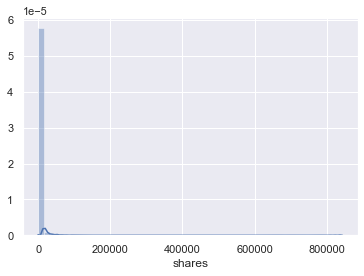

In [35]:
sns.distplot(data_no_mv['shares'])

### Dealing with outliers

In [36]:
q = data_no_mv["shares"].quantile(0.75)
data1 = data_no_mv[data_no_mv['shares']<q]

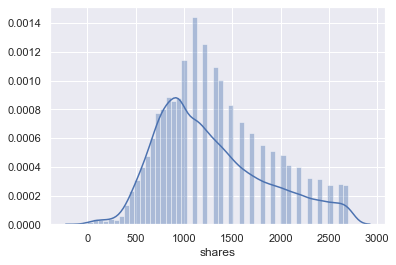

In [37]:
sns.distplot(data1['shares'])

In [38]:
data1.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,29327.000000,29327.000000,29327.000000,29327.000000,29327.000000,29327.000000,29327.000000,29327.000000,29327.000000,29327.000000,...,29327.000000,29327.000000,29327.000000,29327.000000,29327.000000,29327.000000,29327.000000,29327.000000,2.932700e+04,29327.000000
mean,353.012753,10.426092,555.798794,0.547532,0.999924,0.695107,10.369591,3.264228,4.217308,1.180687,...,0.098621,0.774166,-0.273259,-0.550329,-0.113572,0.404686,0.102418,0.364325,2.292784e-01,1277.666485
std,215.455613,2.106711,442.795567,0.099276,0.000461,0.097629,10.379203,3.759820,7.918087,3.994547,...,0.068929,0.209050,0.106344,0.255959,0.089191,0.223160,0.250124,0.165818,1.739396e-01,566.581874
min,8.000000,2.000000,24.000000,0.114964,0.997119,0.123214,0.000000,0.000000,0.000000,0.000000,...,0.033333,0.033333,-1.000000,-1.000000,-1.000000,0.022222,-1.000000,0.001818,1.390000e-17,1.000000
25%,161.000000,9.000000,267.000000,0.481258,1.000000,0.637399,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.325000,-0.700000,-0.125000,0.282356,0.071804,0.200000,1.561508e-01,851.000000
50%,337.000000,10.000000,437.000000,0.546693,1.000000,0.692641,7.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.259269,-0.500000,-0.100000,0.282356,0.071804,0.500000,1.561508e-01,1200.000000
75%,542.000000,12.000000,706.000000,0.607296,1.000000,0.755435,13.000000,4.000000,3.000000,1.000000,...,0.100000,1.000000,-0.201856,-0.400000,-0.050000,0.500000,0.136364,0.500000,2.500000e-01,1600.000000
max,731.000000,20.000000,7764.000000,1.000000,1.000000,1.000000,171.000000,116.000000,128.000000,75.000000,...,1.000000,1.000000,-0.012500,-0.012500,-0.008333,1.000000,1.000000,0.500000,1.000000e+00,2700.000000


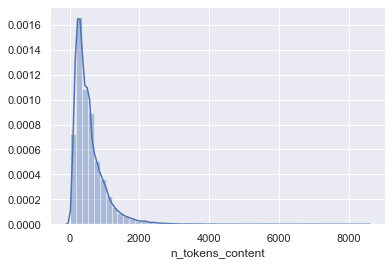

In [39]:
# n_tokens_content
sns.distplot(data_no_mv['n_tokens_content'])

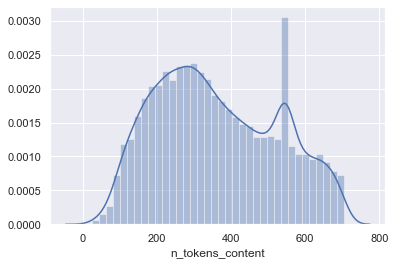

In [40]:
q = data1['n_tokens_content'].quantile(0.75)
data2 = data1[data1['n_tokens_content']<q]
sns.distplot(data2['n_tokens_content'])

In [41]:
data2.iloc[:, 15:].describe()

,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,2.198300e+04,21983.000000,21983.000000,2.198300e+04,2.198300e+04,...,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000,2.198300e+04,21983.000000
mean,0.048674,0.180685,0.223764,27.794932,1100.249011,1.267300e+09,12774.127599,744567.884274,1.098122e+09,8.930059e+08,...,0.109277,0.734931,-0.271760,-0.496669,-0.127525,0.403632,0.101170,0.364672,2.269171e-01,1263.140290
std,0.215190,0.384766,0.416775,71.414085,3811.152578,2.035000e+09,57464.343428,222645.022380,1.600010e+09,1.522728e+09,...,0.074616,0.210424,0.114885,0.242097,0.097001,0.221631,0.246268,0.166055,1.708707e-01,561.898701
min,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000e+00,...,0.033333,0.033333,-1.000000,-1.000000,-1.000000,0.022222,-1.000000,0.001894,2.780000e-17,4.000000
25%,0.000000,0.000000,0.000000,-1.000000,444.000000,2.195000e+02,0.000000,690400.000000,2.207825e+05,0.000000e+00,...,0.062500,0.500000,-0.325715,-0.600000,-0.133333,0.282356,0.071804,0.200000,1.561508e-01,841.000000
50%,0.000000,0.000000,0.000000,-1.000000,645.000000,9.212000e+02,1300.000000,843300.000000,3.874500e+05,1.100000e+03,...,0.100000,0.757211,-0.259269,-0.500000,-0.100000,0.282356,0.071804,0.500000,1.561508e-01,1100.000000
75%,0.000000,0.000000,0.000000,4.000000,981.000000,2.167143e+09,7000.000000,843300.000000,2.191143e+09,1.769359e+09,...,0.136364,1.000000,-0.193750,-0.300000,-0.071429,0.500000,0.136364,0.500000,2.500000e-01,1600.000000
max,1.000000,1.000000,1.000000,294.000000,298400.000000,9.983333e+09,843300.000000,843300.000000,9.981111e+09,9.999138e+09,...,1.000000,1.000000,-0.012500,-0.012500,-0.008333,1.000000,1.000000,0.500000,1.000000e+00,2700.000000


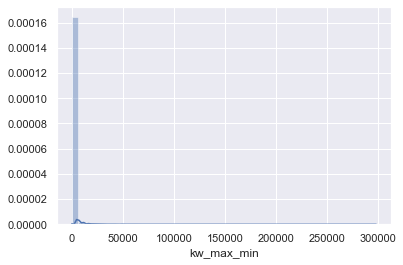

In [42]:
# kw_max_min
sns.distplot(data_no_mv['kw_max_min'])

In [43]:
q = data2['kw_max_min'].quantile(0.75)
data3 = data2[data2['kw_max_min']<q]

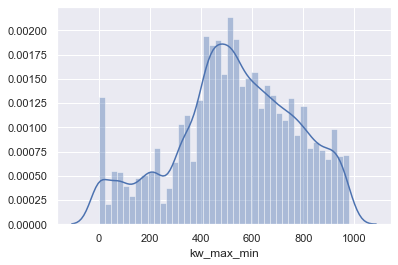

In [44]:
sns.distplot(data3['kw_max_min'])

In [45]:
data3.iloc[:, 15:].describe()

,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,16483.000000,16483.000000,16483.000000,16483.000000,16483.000000,1.648300e+04,16483.000000,16483.000000,1.648300e+04,1.648300e+04,...,16483.000000,16483.000000,16483.000000,16483.000000,16483.000000,16483.000000,16483.000000,16483.000000,1.648300e+04,16483.000000
mean,0.046654,0.170843,0.231147,25.631924,532.471031,1.076312e+09,16110.691986,751796.262816,1.108535e+09,9.801115e+08,...,0.109723,0.732032,-0.272306,-0.496784,-0.128038,0.402186,0.098511,0.363595,2.252066e-01,1248.074986
std,0.210903,0.376383,0.421579,69.051569,238.255395,1.848670e+09,65914.417530,217739.119934,1.605588e+09,1.567945e+09,...,0.075937,0.210805,0.115796,0.243445,0.098314,0.220126,0.244246,0.166477,1.685316e-01,557.073351
min,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000e+00,...,0.033333,0.033333,-1.000000,-1.000000,-1.000000,0.022222,-1.000000,0.001894,2.780000e-17,4.000000
25%,0.000000,0.000000,0.000000,-1.000000,398.000000,1.741000e+02,0.000000,843300.000000,2.335550e+05,0.000000e+00,...,0.062500,0.500000,-0.327778,-0.600000,-0.133333,0.282356,0.071804,0.200000,1.561508e-01,831.000000
50%,0.000000,0.000000,0.000000,-1.000000,532.000000,3.770000e+02,1600.000000,843300.000000,3.987000e+05,1.192800e+03,...,0.100000,0.750000,-0.259269,-0.500000,-0.100000,0.282356,0.071804,0.500000,1.561508e-01,1100.000000
75%,0.000000,0.000000,0.000000,4.000000,708.000000,1.823095e+09,9800.000000,843300.000000,2.253286e+09,1.905452e+09,...,0.136364,1.000000,-0.193750,-0.300000,-0.071429,0.500000,0.136364,0.500000,2.500000e-01,1600.000000
max,1.000000,1.000000,1.000000,217.000000,980.000000,9.983333e+09,843300.000000,843300.000000,9.934444e+09,9.999138e+09,...,1.000000,1.000000,-0.012500,-0.012500,-0.008333,1.000000,1.000000,0.500000,1.000000e+00,2700.000000


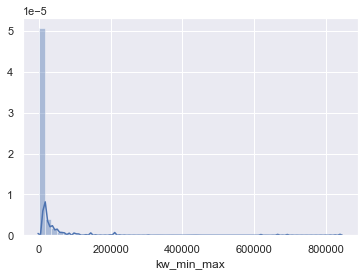

In [46]:
# kw_min_max
sns.distplot(data_no_mv['kw_min_max'])

In [47]:
q = data3['kw_min_max'].quantile(0.75)
data4 = data3[data3['kw_min_max']<q]

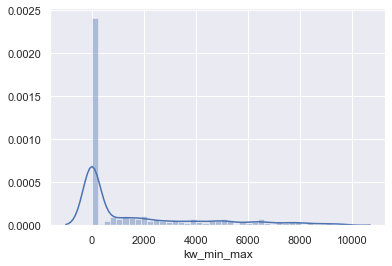

In [48]:
sns.distplot(data4['kw_min_max'])

In [49]:
data4.iloc[:, 25:].describe()

,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,1.233800e+04,1.233800e+04,12338.000000,12338.000000,1.233800e+04,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,...,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,1.233800e+04,12338.000000
mean,3.689910e+09,2.477458e+09,3860.611926,9377.673314,3.739652e+08,0.173772,0.190387,0.200357,0.189172,0.146701,...,0.108661,0.728585,-0.268367,-0.489993,-0.127072,0.397055,0.097022,0.362285,2.197883e-01,1231.687145
std,2.052965e+09,1.138081e+09,14855.886157,30826.617190,1.209470e+09,0.378929,0.392623,0.400283,0.391661,0.353822,...,0.073107,0.210081,0.114472,0.242025,0.097854,0.215659,0.235449,0.167190,1.624383e-01,555.380421
min,0.000000e+00,0.000000e+00,1.000000,4.000000,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.033333,0.033333,-1.000000,-1.000000,-1.000000,0.022222,-1.000000,0.001894,2.780000e-17,5.000000
25%,3.258010e+09,2.026860e+09,977.000000,1800.000000,1.626438e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.062500,0.500000,-0.322917,-0.600000,-0.125000,0.282356,0.071804,0.200000,1.561508e-01,819.000000
50%,3.575342e+09,2.475294e+09,1800.000000,4500.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,0.750000,-0.259269,-0.500000,-0.100000,0.282356,0.071804,0.500000,1.561508e-01,1100.000000
75%,4.594176e+09,2.977776e+09,3993.319780,10308.877941,3.741554e+08,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.136364,1.000000,-0.189583,-0.300000,-0.071429,0.500000,0.136364,0.500000,2.142857e-01,1600.000000
max,9.998333e+09,9.882752e+09,843300.000000,843300.000000,9.976667e+09,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,-0.025000,-0.025000,-0.008333,1.000000,1.000000,0.500000,1.000000e+00,2700.000000


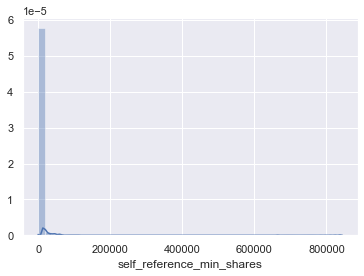

In [50]:
# self_reference_min_shares
sns.distplot(data4['self_reference_min_shares'])

In [51]:
q = data4['self_reference_min_shares'].quantile(0.75)
data5 = data4[data4['self_reference_min_shares']<q]

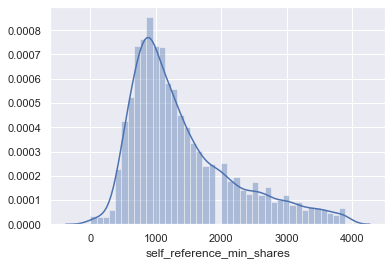

In [52]:
sns.distplot(data5['self_reference_min_shares'])

In [53]:
data5.iloc[:, 25:].describe()

,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,8.290000e+03,8.290000e+03,8290.000000,8290.000000,8.290000e+03,8290.000000,8290.000000,8290.000000,8290.000000,8290.000000,...,8290.000000,8290.000000,8290.000000,8290.000000,8290.000000,8290.000000,8290.000000,8290.000000,8.290000e+03,8290.000000
mean,3.620993e+09,2.442545e+09,1407.226417,6704.756212,4.437614e+08,0.175633,0.191556,0.197587,0.190953,0.142461,...,0.107704,0.721923,-0.267998,-0.486916,-0.126799,0.393573,0.092681,0.364635,2.172563e-01,1215.327503
std,1.984169e+09,1.092742e+09,799.618313,26117.031849,1.442551e+09,0.380531,0.393549,0.398203,0.393076,0.349543,...,0.072345,0.211733,0.116319,0.245588,0.098047,0.213862,0.232432,0.167186,1.595700e-01,540.956758
min,0.000000e+00,0.000000e+00,1.000000,4.000000,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.033333,0.050000,-1.000000,-1.000000,-1.000000,0.022222,-1.000000,0.002273,2.780000e-17,43.000000
25%,3.264356e+09,2.028347e+09,829.250000,1400.000000,1.300000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.062500,0.500000,-0.325000,-0.600000,-0.133333,0.282356,0.071804,0.200000,1.561508e-01,817.000000
50%,3.573282e+09,2.465555e+09,1200.000000,2400.000000,2.139750e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,0.700000,-0.255556,-0.500000,-0.100000,0.282356,0.071804,0.500000,1.561508e-01,1100.000000
75%,4.404466e+09,2.926838e+09,1800.000000,4900.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.136364,1.000000,-0.186111,-0.300000,-0.071429,0.474107,0.136364,0.500000,2.000000e-01,1500.000000
max,9.998333e+09,9.882752e+09,3900.000000,690400.000000,9.976667e+09,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,-0.025000,-0.025000,-0.008333,1.000000,1.000000,0.500000,1.000000e+00,2700.000000


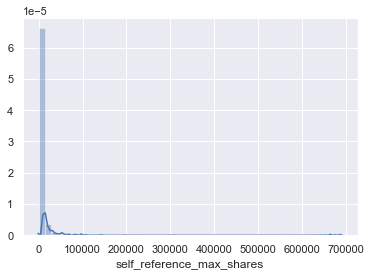

In [54]:
# self_reference_max_shares
sns.distplot(data5['self_reference_max_shares'])

In [55]:
q = data5['self_reference_max_shares'].quantile(0.75)
data6 = data5[data5['self_reference_max_shares']<q]

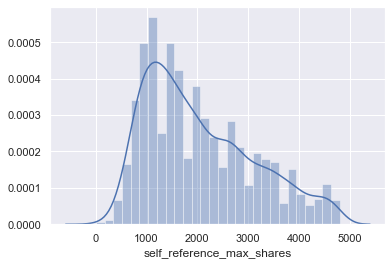

In [56]:
sns.distplot(data6['self_reference_max_shares'])

In [57]:
data6.iloc[:, 20:].describe()

,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,6.210000e+03,6210.000000,6210.000000,6.210000e+03,6.210000e+03,6.210000e+03,6.210000e+03,6210.000000,6210.000000,6.210000e+03,...,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000
mean,1.045833e+09,1700.145411,743105.845411,1.058199e+09,6.012101e+08,3.601590e+09,2.397618e+09,1405.229952,2046.510306,2.579764e+08,...,0.109088,0.713393,-0.266621,-0.483702,-0.127454,0.393161,0.090681,0.365083,0.216464,1192.690499
std,1.766204e+09,2501.082872,228708.735853,1.447378e+09,1.573732e+09,1.949326e+09,1.069663e+09,796.985058,1072.660605,1.112274e+09,...,0.074344,0.210682,0.117389,0.246119,0.099917,0.214438,0.232410,0.166502,0.159397,536.610836
min,-1.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000,4.000000,4.000000e+00,...,0.033333,0.050000,-1.000000,-1.000000,-1.000000,0.022222,-1.000000,0.002273,0.001515,43.000000
25%,1.880000e+02,0.000000,843300.000000,2.169488e+05,0.000000e+00,3.264233e+09,1.992830e+09,825.000000,1200.000000,1.100000e+03,...,0.062500,0.500000,-0.324204,-0.600000,-0.133333,0.282356,0.071804,0.200000,0.156151,800.000000
50%,3.742000e+02,0.000000,843300.000000,3.628150e+05,0.000000e+00,3.557059e+09,2.421722e+09,1200.000000,1800.000000,1.650000e+03,...,0.100000,0.700000,-0.254762,-0.500000,-0.100000,0.282356,0.071804,0.500000,0.156151,1100.000000
75%,1.841865e+09,2800.000000,843300.000000,2.207110e+09,1.267122e+08,4.360521e+09,2.875024e+09,1800.000000,2800.000000,2.500000e+03,...,0.136364,0.900000,-0.184549,-0.300000,-0.071429,0.458333,0.136364,0.500000,0.200000,1500.000000
max,9.971429e+09,9700.000000,843300.000000,9.894114e+09,9.999138e+09,9.998333e+09,9.882752e+09,3900.000000,4800.000000,9.976667e+09,...,1.000000,1.000000,-0.025000,-0.025000,-0.008333,1.000000,1.000000,0.500000,1.000000,2700.000000


In [58]:
# reset index
data_cleaned = data6.reset_index(drop=True)

In [59]:
data_cleaned

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.341750,0.187500,593.0
1,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.282356,0.071804,0.500000,0.156151,1500.0
2,731.0,9.0,391.0,0.510256,1.0,0.650000,9.0,2.0,1.0,1.0,...,0.050000,0.350000,-0.108333,-0.166667,-0.050000,0.282356,0.071804,0.500000,0.156151,598.0
3,731.0,13.0,244.0,0.560000,1.0,0.680272,3.0,2.0,1.0,0.0,...,0.136364,0.433333,-0.456481,-1.000000,-0.125000,0.700000,-0.400000,0.200000,0.400000,852.0
4,731.0,8.0,266.0,0.572581,1.0,0.721088,5.0,2.0,1.0,0.0,...,0.250000,0.350000,-0.116667,-0.200000,-0.050000,0.900000,0.400000,0.400000,0.400000,783.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6205,9.0,13.0,413.0,0.556675,1.0,0.692913,11.0,2.0,1.0,0.0,...,0.100000,0.500000,-0.525000,-0.750000,-0.300000,0.650000,0.071804,0.150000,0.156151,2400.0
6206,9.0,14.0,436.0,0.529412,1.0,0.701681,6.0,6.0,2.0,0.0,...,0.100000,0.700000,-0.255208,-0.500000,-0.100000,0.850000,-0.400000,0.350000,0.400000,947.0
6207,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.700000,-0.211111,-0.400000,-0.100000,0.300000,1.000000,0.200000,1.000000,1900.0
6208,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.500000,-0.356439,-0.800000,-0.166667,0.454545,0.136364,0.045455,0.136364,1900.0


In [60]:
data_cleaned.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,6210.000000,6210.000000,6210.000000,6210.000000,6.210000e+03,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,...,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000,6210.000000
mean,350.889855,10.531079,353.011594,0.581662,1.000000e+00,0.722531,7.989533,3.015942,2.622544,0.743800,...,0.109088,0.713393,-0.266621,-0.483702,-0.127454,0.393161,0.090681,0.365083,0.216464,1192.690499
std,221.326919,2.113943,158.012215,0.080918,3.676529e-09,0.085137,7.158518,1.940300,4.833502,2.317571,...,0.074344,0.210682,0.117389,0.246119,0.099917,0.214438,0.232410,0.166502,0.159397,536.610836
min,8.000000,3.000000,32.000000,0.273026,9.999999e-01,0.290859,1.000000,1.000000,0.000000,0.000000,...,0.033333,0.050000,-1.000000,-1.000000,-1.000000,0.022222,-1.000000,0.002273,0.001515,43.000000
25%,151.250000,9.000000,228.000000,0.525212,1.000000e+00,0.671404,4.000000,2.000000,1.000000,0.000000,...,0.062500,0.500000,-0.324204,-0.600000,-0.133333,0.282356,0.071804,0.200000,0.156151,800.000000
50%,330.000000,10.000000,331.000000,0.572603,1.000000e+00,0.720721,6.000000,3.000000,1.000000,0.000000,...,0.100000,0.700000,-0.254762,-0.500000,-0.100000,0.282356,0.071804,0.500000,0.156151,1100.000000
75%,547.750000,12.000000,468.750000,0.629328,1.000000e+00,0.772961,9.000000,4.000000,2.000000,1.000000,...,0.136364,0.900000,-0.184549,-0.300000,-0.071429,0.458333,0.136364,0.500000,0.200000,1500.000000
max,731.000000,18.000000,705.000000,0.948718,1.000000e+00,1.000000,91.000000,19.000000,64.000000,59.000000,...,1.000000,1.000000,-0.025000,-0.025000,-0.008333,1.000000,1.000000,0.500000,1.000000,2700.000000


Text(0.5, 1.0, 'n_tokens_content and Shares')

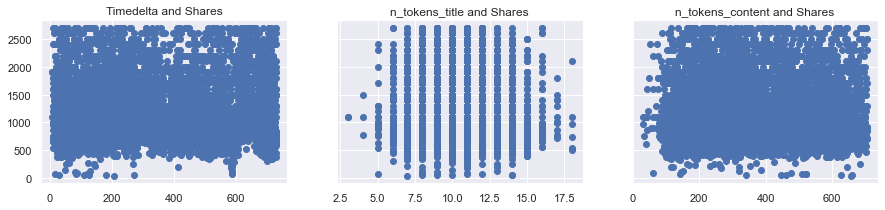

In [61]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['timedelta'], data_cleaned['shares'])
ax1.set_title("Timedelta and Shares")
ax2.scatter(data_cleaned['n_tokens_title'], data_cleaned['shares'])
ax2.set_title("n_tokens_title and Shares")
ax3.scatter(data_cleaned['n_tokens_content'], data_cleaned['shares'])
ax3.set_title("n_tokens_content and Shares")

### Relaxing the assumptions

In [62]:
# np.log(x) returns the natural logarithim of a array of numbers
# I will transform 'shares' with a log transformation
log_shares = np.log(data_cleaned['shares'])
data_cleaned['log_shares'] = log_shares

In [63]:
data_cleaned

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.341750,0.187500,593.0,6.385194
1,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.000000,-0.466667,-0.800000,-0.133333,0.282356,0.071804,0.500000,0.156151,1500.0,7.313220
2,731.0,9.0,391.0,0.510256,1.0,0.650000,9.0,2.0,1.0,1.0,...,0.350000,-0.108333,-0.166667,-0.050000,0.282356,0.071804,0.500000,0.156151,598.0,6.393591
3,731.0,13.0,244.0,0.560000,1.0,0.680272,3.0,2.0,1.0,0.0,...,0.433333,-0.456481,-1.000000,-0.125000,0.700000,-0.400000,0.200000,0.400000,852.0,6.747587
4,731.0,8.0,266.0,0.572581,1.0,0.721088,5.0,2.0,1.0,0.0,...,0.350000,-0.116667,-0.200000,-0.050000,0.900000,0.400000,0.400000,0.400000,783.0,6.663133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6205,9.0,13.0,413.0,0.556675,1.0,0.692913,11.0,2.0,1.0,0.0,...,0.500000,-0.525000,-0.750000,-0.300000,0.650000,0.071804,0.150000,0.156151,2400.0,7.783224
6206,9.0,14.0,436.0,0.529412,1.0,0.701681,6.0,6.0,2.0,0.0,...,0.700000,-0.255208,-0.500000,-0.100000,0.850000,-0.400000,0.350000,0.400000,947.0,6.853299
6207,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.700000,-0.211111,-0.400000,-0.100000,0.300000,1.000000,0.200000,1.000000,1900.0,7.549609
6208,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.500000,-0.356439,-0.800000,-0.166667,0.454545,0.136364,0.045455,0.136364,1900.0,7.549609


Text(0.5, 1.0, 'n_tokens_content and log_shares')

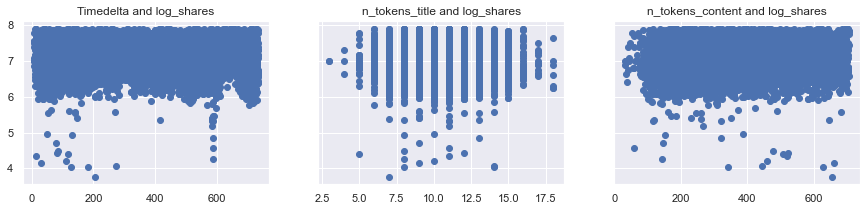

In [64]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['timedelta'], data_cleaned['log_shares'])
ax1.set_title("Timedelta and log_shares")
ax2.scatter(data_cleaned['n_tokens_title'], data_cleaned['log_shares'])
ax2.set_title("n_tokens_title and log_shares")
ax3.scatter(data_cleaned['n_tokens_content'], data_cleaned['log_shares'])
ax3.set_title("n_tokens_content and log_shares")

In [65]:
# I will delete the 'shares' variable
data_cleaned = data_cleaned.drop(['shares'], axis=1)

In [66]:
data_cleaned.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,log_shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.34175,0.187500,6.385194
1,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.282356,0.071804,0.50000,0.156151,7.313220
2,731.0,9.0,391.0,0.510256,1.0,0.650000,9.0,2.0,1.0,1.0,...,0.050000,0.350000,-0.108333,-0.166667,-0.050000,0.282356,0.071804,0.50000,0.156151,6.393591
3,731.0,13.0,244.0,0.560000,1.0,0.680272,3.0,2.0,1.0,0.0,...,0.136364,0.433333,-0.456481,-1.000000,-0.125000,0.700000,-0.400000,0.20000,0.400000,6.747587
4,731.0,8.0,266.0,0.572581,1.0,0.721088,5.0,2.0,1.0,0.0,...,0.250000,0.350000,-0.116667,-0.200000,-0.050000,0.900000,0.400000,0.40000,0.400000,6.663133


### Define Corelated Variables

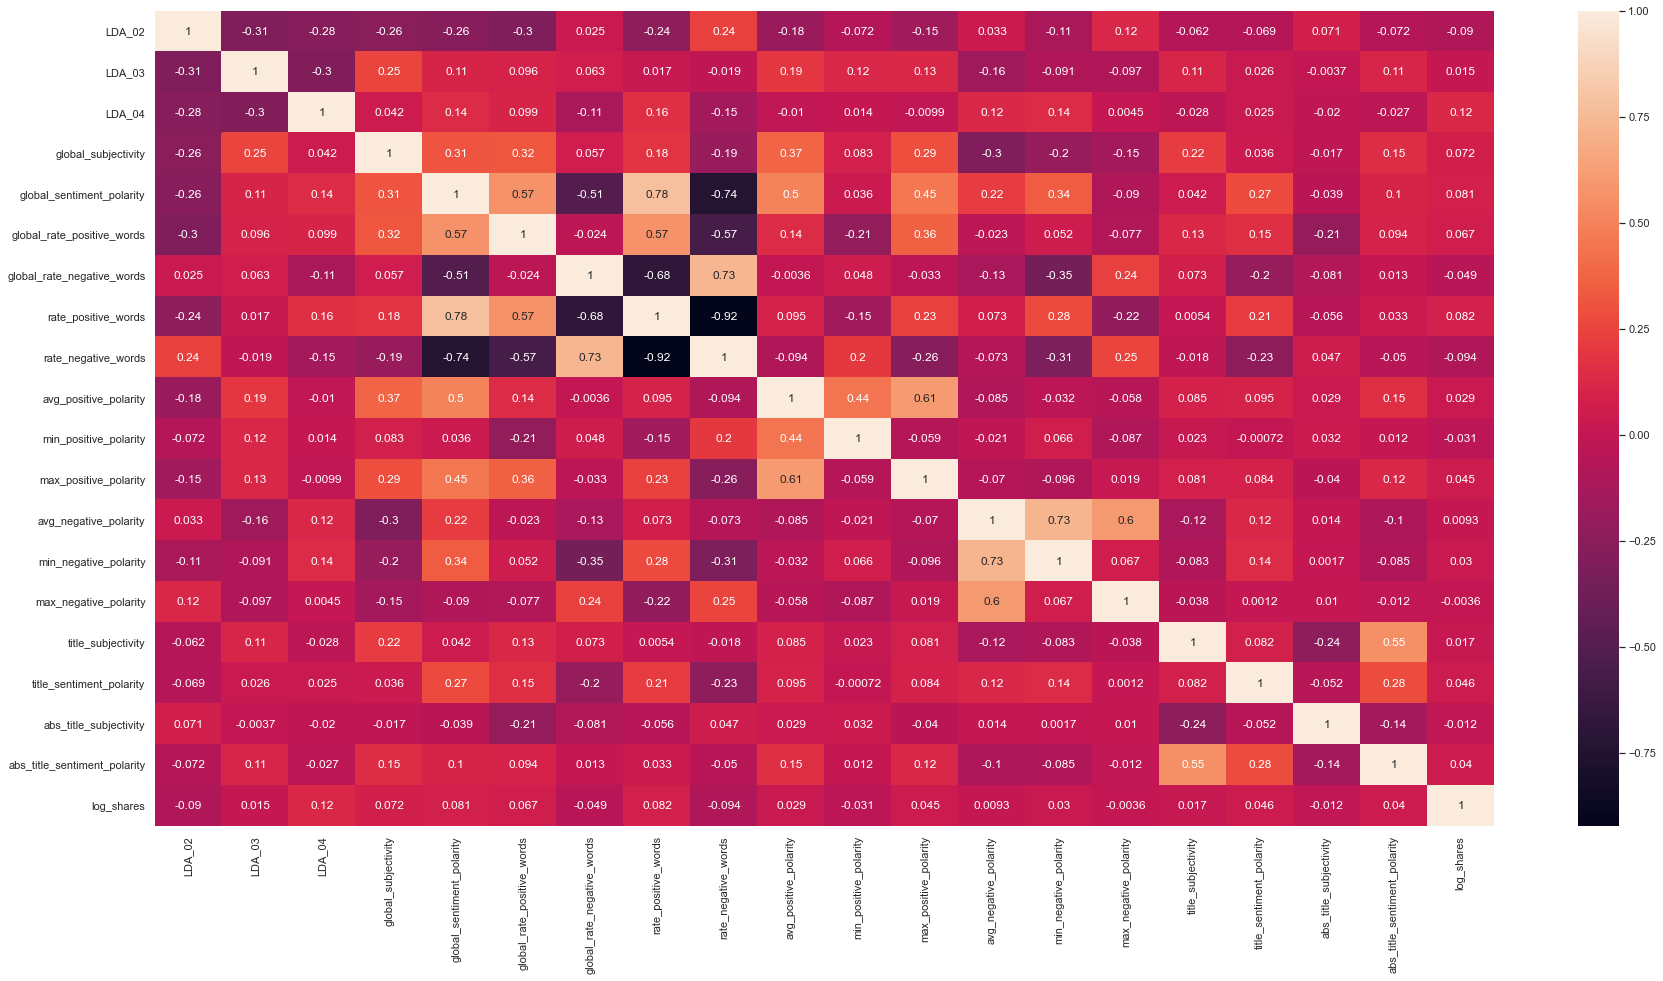

In [67]:
plt.figure(figsize=(30,15))
sns.heatmap(data_cleaned.iloc[:,40:].corr(), annot=True)

In [68]:
df_corr = data_cleaned.corr()
new_df = pd.DataFrame(df_corr["log_shares"])
new_df

,log_shares
timedelta,0.016903
n_tokens_title,-0.021419
n_tokens_content,0.013734
n_unique_tokens,-0.037998
n_non_stop_words,0.020796
n_non_stop_unique_tokens,-0.066607
num_hrefs,0.107497
num_self_hrefs,0.004375
num_imgs,0.077686
num_videos,0.047001


In [69]:
data_corr = data_cleaned[['num_hrefs', "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world", "self_reference_min_shares",
                          "self_reference_max_shares", "weekday_is_saturday", "is_weekend", "LDA_04", "log_shares"]]

In [70]:
data_corr

,num_hrefs,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,self_reference_min_shares,self_reference_max_shares,weekday_is_saturday,is_weekend,LDA_04,log_shares
0,4.0,0.0,0.0,0.0,496.0,496.0,0.0,0.0,0.040123,6.385194
1,3.0,0.0,0.0,0.0,918.0,918.0,0.0,0.0,0.682188,7.313220
2,9.0,0.0,0.0,1.0,704.0,704.0,0.0,0.0,0.233412,6.393591
3,3.0,0.0,0.0,0.0,2800.0,2800.0,0.0,0.0,0.549704,6.747587
4,5.0,0.0,1.0,0.0,924.0,924.0,0.0,0.0,0.572471,6.663133
...,...,...,...,...,...,...,...,...,...,...
6205,11.0,0.0,0.0,1.0,1500.0,1500.0,0.0,0.0,0.022225,7.783224
6206,6.0,0.0,1.0,0.0,878.0,4200.0,0.0,0.0,0.899986,6.853299
6207,9.0,1.0,0.0,0.0,2100.0,2100.0,0.0,0.0,0.028575,7.549609
6208,24.0,0.0,0.0,0.0,1400.0,1400.0,0.0,0.0,0.146970,7.549609


### Multicollinearity

In [71]:
data_corr.columns

Index(['num_hrefs', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'self_reference_min_shares',
       'self_reference_max_shares', 'weekday_is_saturday', 'is_weekend',
       'LDA_04', 'log_shares'],
      dtype='object')

In [72]:
data_corr.dtypes

num_hrefs                    float64
data_channel_is_socmed       float64
data_channel_is_tech         float64
data_channel_is_world        float64
self_reference_min_shares    float64
self_reference_max_shares    float64
weekday_is_saturday          float64
is_weekend                   float64
LDA_04                       float64
log_shares                   float64
dtype: object

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_corr[['num_hrefs', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'self_reference_min_shares',
       'self_reference_max_shares', 'weekday_is_saturday', 'is_weekend',
       'LDA_04']]

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [74]:
vif

,VIF,Features
0,2.012825,num_hrefs
1,1.079429,data_channel_is_socmed
2,2.916558,data_channel_is_tech
3,1.377707,data_channel_is_world
4,4.610867,self_reference_min_shares
5,5.200318,self_reference_max_shares
6,1.850335,weekday_is_saturday
7,1.953520,is_weekend
8,3.579811,LDA_04


In [75]:
# Rearrange a bit
data_corr.columns

Index(['num_hrefs', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'self_reference_min_shares',
       'self_reference_max_shares', 'weekday_is_saturday', 'is_weekend',
       'LDA_04', 'log_shares'],
      dtype='object')

In [76]:
col = ['log_shares', 'num_hrefs', 'self_reference_min_shares', "self_reference_max_shares", "LDA_04", 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'is_weekend']

In [77]:
data_preprocessed = data_corr[col]
data_preprocessed

,log_shares,num_hrefs,self_reference_min_shares,self_reference_max_shares,LDA_04,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,is_weekend
0,6.385194,4.0,496.0,496.0,0.040123,0.0,0.0,0.0,0.0
1,7.313220,3.0,918.0,918.0,0.682188,0.0,0.0,0.0,0.0
2,6.393591,9.0,704.0,704.0,0.233412,0.0,0.0,1.0,0.0
3,6.747587,3.0,2800.0,2800.0,0.549704,0.0,0.0,0.0,0.0
4,6.663133,5.0,924.0,924.0,0.572471,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6205,7.783224,11.0,1500.0,1500.0,0.022225,0.0,0.0,1.0,0.0
6206,6.853299,6.0,878.0,4200.0,0.899986,0.0,1.0,0.0,0.0
6207,7.549609,9.0,2100.0,2100.0,0.028575,1.0,0.0,0.0,0.0
6208,7.549609,24.0,1400.0,1400.0,0.146970,0.0,0.0,0.0,0.0


## Linear Regression Model

In [78]:
# Assign the dependent and independent variables
targets = data_preprocessed['log_shares']
inputs = data_preprocessed.drop(['log_shares'], axis=1)

In [79]:
# Scale the inputs data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [80]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.3, random_state = 365)

In [81]:
# Create linear regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [82]:
# testing
y_pred_lr = linear_reg.predict(x_test)

(6.710696457796361, 7.710045203646359)

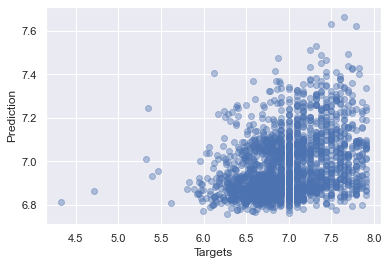

In [83]:
# Create a scatter plot between actual and predicted values
plt.scatter(y_test, y_pred_lr, alpha=0.4)
plt.xlabel("Targets")
plt.ylabel("Prediction")
plt.xlim()
plt.ylim()

In [84]:
# To obtain the actual values we need to take the exponential of the log_shares
lr_result_df = pd.DataFrame(np.exp(y_pred_lr), columns=['Predictions'])
lr_result_df['Targets'] = np.exp(y_test)
lr_result_df

,Predictions,Targets
0,940.915169,593.0
1,941.204953,1500.0
2,998.488053,NaN
3,1391.722606,NaN
4,1181.922726,NaN
...,...,...
1858,998.199615,NaN
1859,1335.515646,NaN
1860,960.186292,NaN
1861,1188.659052,1700.0


In [85]:
# We need to reset index of tragets column
y_test = y_test.reset_index(drop=True)
y_test.head()


0    6.698268
1    6.405228
2    7.696213
3    7.783224
4    6.751101
Name: log_shares, dtype: float64

In [86]:
lr_result_df['Targets'] = np.exp(y_test)

In [87]:
lr_result_df

,Predictions,Targets
0,940.915169,811.0
1,941.204953,605.0
2,998.488053,2200.0
3,1391.722606,2400.0
4,1181.922726,855.0
...,...,...
1858,998.199615,608.0
1859,1335.515646,1000.0
1860,960.186292,716.0
1861,1188.659052,750.0


In [88]:
lr_result_df['Residual'] = lr_result_df['Targets'] - lr_result_df['Predictions']
lr_result_df

,Predictions,Targets,Residual
0,940.915169,811.0,-129.915169
1,941.204953,605.0,-336.204953
2,998.488053,2200.0,1201.511947
3,1391.722606,2400.0,1008.277394
4,1181.922726,855.0,-326.922726
...,...,...,...
1858,998.199615,608.0,-390.199615
1859,1335.515646,1000.0,-335.515646
1860,960.186292,716.0,-244.186292
1861,1188.659052,750.0,-438.659052


In [89]:
lr_result_df['Difference%'] = np.absolute(lr_result_df['Residual'] / lr_result_df['Targets']*100)
lr_result_df

,Predictions,Targets,Residual,Difference%
0,940.915169,811.0,-129.915169,16.019133
1,941.204953,605.0,-336.204953,55.571067
2,998.488053,2200.0,1201.511947,54.614179
3,1391.722606,2400.0,1008.277394,42.011558
4,1181.922726,855.0,-326.922726,38.236576
...,...,...,...,...
1858,998.199615,608.0,-390.199615,64.177568
1859,1335.515646,1000.0,-335.515646,33.551565
1860,960.186292,716.0,-244.186292,34.104231
1861,1188.659052,750.0,-438.659052,58.487874


In [90]:
lr_result_df.describe()

,Predictions,Targets,Residual,Difference%
count,1863.000000,1863.000000,1863.000000,1863.000000
mean,1091.148394,1194.312936,103.164542,35.928704
std,171.003217,538.345570,511.416240,45.991232
min,859.302833,76.000000,-1192.470087,0.008000
25%,965.279935,795.500000,-253.873841,13.614373
50%,1034.045112,1100.000000,-23.702399,27.927856
75%,1174.203400,1500.000000,366.122740,47.323183
max,2131.583182,2700.000000,1762.078531,1095.557720


In [91]:
# Accuracy score
lr_accuracy = linear_reg.score(x_train, y_train)
lr_accuracy

0.09681149028096925

In [92]:
lr_intercept = linear_reg.intercept_
lr_intercept

6.983578557634971

In [93]:
lr_coef = linear_reg.coef_
lr_df_coef = pd.DataFrame(inputs.columns, columns = ['Features'])
lr_df_coef['Weights'] = lr_coef
lr_df_coef

,Features,Weights
0,num_hrefs,0.047842
1,self_reference_min_shares,0.049290
2,self_reference_max_shares,0.014533
3,LDA_04,0.019859
4,data_channel_is_socmed,0.060405
5,data_channel_is_tech,0.044158
6,data_channel_is_world,-0.019553
7,is_weekend,0.074178


In [145]:
errors = abs(lr_result_df['Predictions'] - lr_result_df['Targets'])
mape = 100 * (errors/lr_result_df['Targets'])

lr_accuracy = 100 - np.mean(mape)
print("Accuracy score: ", round(lr_accuracy, 2), "%")

Accuracy score:  64.07 %


# Support Vector Machine Regression

In [94]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
y_pred_svr

array([6.90442245, 6.78878891, 6.98043334, ..., 6.87235393, 7.09324652,
       6.93692263])

In [95]:
# RandomizedSearchCV method
from sklearn.model_selection import RandomizedSearchCV
params = {
    "kernel": ['linear', 'poly', 'rbf'],
    "C": [1, 10, 100, 1e3, 1e4, 1e5, 1e6],
    "gamma": [0.001, 0.0001, 0.00001]
}

svr_search = RandomizedSearchCV(svr, params, cv=5)
svr_search.fit(x_train, y_train)
print(svr_search.best_params_)

{'kernel': 'rbf', 'gamma': 1e-05, 'C': 100000.0}


In [96]:
svr = SVR(kernel = 'rbf', C = 100000.0, gamma = 1e-05)
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
y_pred_svr

array([6.85760878, 6.83216857, 6.92190799, ..., 6.8482557 , 7.05801004,
       6.97644458])

In [102]:
svr_result_df = pd.DataFrame(np.exp(y_pred_svr), columns = ['Predictions'])
svr_result_df['Targets'] = np.exp(y_test)

In [103]:
errors = abs(svr_result_df['Predictions'] - svr_result_df['Targets'])
mape = 100 * (errors/svr_result_df['Targets'])

svr_accuracy = 100 - np.mean(mape)

In [104]:
print("Accuracy: ", round(svr_accuracy, 2), " %")

Accuracy:  64.68  %


In [105]:
svr_result_df['Residuals'] = errors
svr_result_df['Difference%'] = mape
svr_result_df

,Predictions,Targets,Residuals,Difference%
0,951.090080,811.0,140.090080,17.273746
1,927.199334,605.0,322.199334,53.256088
2,1014.253334,2200.0,1185.746666,53.897576
3,1435.048631,2400.0,964.951369,40.206307
4,1154.748364,855.0,299.748364,35.058288
...,...,...,...,...
1858,999.420291,608.0,391.420291,64.378337
1859,1323.779787,1000.0,323.779787,32.377979
1860,942.235928,716.0,226.235928,31.597197
1861,1162.130266,750.0,412.130266,54.950702


In [106]:
svr_result_df.describe()

,Predictions,Targets,Residuals,Difference%
count,1863.000000,1863.000000,1863.000000,1863.000000
mean,1078.202799,1194.312936,385.807846,35.320220
std,181.033245,538.345570,354.549578,45.404361
min,829.117540,76.000000,0.775634,0.076881
25%,950.652048,795.500000,136.708056,13.000862
50%,1025.052799,1100.000000,287.202632,27.332302
75%,1148.212619,1500.000000,502.664148,46.298639
max,2173.603873,2700.000000,1767.556862,1098.120236


In [110]:
from sklearn.metrics import mean_squared_error
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
rmse_svr

0.42487457501821174

# k-Nearest Neighbors Regression

In [112]:
# Import the relevant libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from math import sqrt

In [117]:
# Finding best k value
rmse_val = []
for k in range(20):
    k = k+1
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(x_train, y_train)
    y_pred_knn = model.predict(x_test)
    errors = sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_knn)))
    rmse_val.append(errors)
    print("RMSE value for k = ", k, " is:", errors)

RMSE value for k =  1  is: 710.1457268062148
RMSE value for k =  2  is: 608.5992087664837
RMSE value for k =  3  is: 576.0517195436491
RMSE value for k =  4  is: 560.5650906493556
RMSE value for k =  5  is: 551.5726299324281
RMSE value for k =  6  is: 542.633685414668
RMSE value for k =  7  is: 537.4060998276449
RMSE value for k =  8  is: 535.3185523070722
RMSE value for k =  9  is: 534.0041193395253
RMSE value for k =  10  is: 532.170571793
RMSE value for k =  11  is: 531.00905943963
RMSE value for k =  12  is: 529.3603537522823
RMSE value for k =  13  is: 528.308490032503
RMSE value for k =  14  is: 527.3900926214795
RMSE value for k =  15  is: 526.0334230493144
RMSE value for k =  16  is: 525.5748752937852
RMSE value for k =  17  is: 525.0430703589029
RMSE value for k =  18  is: 524.9600951934227
RMSE value for k =  19  is: 525.1282791714891
RMSE value for k =  20  is: 524.1875590478203


In [121]:
# RandomizedSearchCV method
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    "n_neighbors": [int(x) for x in np.linspace(start=1, stop=15, num=10)],
    "leaf_size": [int(x) for x in np.linspace(start=1, stop=100, num=10)]
}
knn = KNeighborsRegressor()
model = RandomizedSearchCV(knn, parameters, cv=5)
model.fit(x_train, y_train)
print(model.best_params_)

{'n_neighbors': 15, 'leaf_size': 34}


In [129]:
# Check RandomizedSearch method
knn_reg_rs = KNeighborsRegressor(n_neighbors = 15, leaf_size = 34)
knn_reg_rs.fit(x_train, y_train)

KNeighborsRegressor(leaf_size=34, n_neighbors=15)

In [130]:
y_pred_knn_rs = knn_reg_rs.predict(x_test)
y_pred_knn_rs

array([6.97797123, 6.7242354 , 6.94379228, ..., 6.73350968, 7.18574103,
       6.81856236])

In [131]:
rmse_knn_with_rs = np.sqrt(mean_squared_error(y_test, y_pred_knn_rs))
rmse_knn_with_rs

0.4318033221313352

In [137]:
# Check when k=20
knn_reg_k = KNeighborsRegressor(n_neighbors=20)
knn_reg_k.fit(x_train, y_train)
y_pred_knn_k = knn_reg_k.predict(x_test)
y_pred_knn_k

array([6.92944591, 6.67536457, 6.87183417, ..., 6.77804014, 7.03249336,
       6.87625114])

In [138]:
rmse_knn_with_k = np.sqrt(mean_squared_error(y_test, y_pred_knn_k))
rmse_knn_with_k

0.42875875086466875

In [142]:
knn_result_df = pd.DataFrame({
    "Predictions": np.exp(y_pred_knn_k),
    "Targets": np.exp(y_test),
    "Residual": abs(np.exp(y_pred_knn_k) - np.exp(y_test)),
    "Difference%": 100*( abs(np.exp(y_pred_knn_k) - np.exp(y_test)) / np.exp(y_test) )
})
knn_result_df

,Predictions,Targets,Residual,Difference%
0,1021.927581,811.0,210.927581,26.008333
1,792.636376,605.0,187.636376,31.014277
2,964.716400,2200.0,1235.283600,56.149255
3,1548.603313,2400.0,851.396687,35.474862
4,1041.834126,855.0,186.834126,21.851945
...,...,...,...,...
1858,930.114829,608.0,322.114829,52.979413
1859,1189.493478,1000.0,189.493478,18.949348
1860,878.345598,716.0,162.345598,22.673966
1861,1132.851697,750.0,382.851697,51.046893


In [144]:
errors = abs(knn_result_df['Predictions'] - knn_result_df['Targets'])
mape = 100 * (errors / knn_result_df['Targets'])

knn_accuracy = 100 - np.mean(mape)
print("Accuracy score: ", round(knn_accuracy, 2), "%")

Accuracy score:  63.95 %


# Random Forest Regressor

In [151]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [158]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    "n_estimators": [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    #"criterion": ["squared_error", "absolute_error", "poisson"],
    "max_depth": [int(x) for x in np.linspace(start=1, stop=20, num=10)]
}
reg = RandomForestRegressor()
model = RandomizedSearchCV(reg, params, cv=5)
model.fit(x_train, y_train)
print(model.best_params_)

{'n_estimators': 500, 'max_depth': 7}


In [159]:
ranfor_reg = RandomForestRegressor(n_estimators=500, max_depth=7)
ranfor_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=500)

In [160]:
y_pred_rfr = ranfor_reg.predict(x_test)
y_pred_rfr

array([6.90588285, 6.84010082, 6.92847159, ..., 6.85226063, 7.05460277,
       7.0088568 ])

In [164]:
errors = abs(np.exp(y_pred_rfr) - np.exp(y_test))
mape = 100*(errors / np.exp(y_test))
rfr_accuracy = 100 - np.mean(mape)
print("Accuarcy: ", round(rfr_accuracy, 2), "%")

Accuarcy:  64.22 %


In [166]:
rmse_rfr = np.sqrt(mean_squared_error(np.exp(y_pred_rfr), np.exp(y_test)))
rmse_rfr

521.0820948249491

In [168]:
rfr_result_df = pd.DataFrame({
    "Predictions": np.exp(y_pred_rfr),
    "Targets": np.exp(y_test),
    "Residual": errors,
    "Difference%": mape
})
rfr_result_df

,Predictions,Targets,Residual,Difference%
0,998.129324,811.0,187.129324,23.073899
1,934.583351,605.0,329.583351,54.476587
2,1020.932379,2200.0,1179.067621,53.593983
3,1588.040531,2400.0,811.959469,33.831645
4,1042.994718,855.0,187.994718,21.987686
...,...,...,...,...
1858,1040.822766,608.0,432.822766,71.187955
1859,1402.455213,1000.0,402.455213,40.245521
1860,946.017085,716.0,230.017085,32.125291
1861,1158.177315,750.0,408.177315,54.423642


### Final result

In [177]:
print("-------------------------------------------------")
print()
print("Accuracy for MLR: ", round(lr_accuracy, 2), "%")
print("Accuracy for SVR: ", round(svr_accuracy, 2), "%")
print("Accuracy for KNN: ", round(knn_accuracy, 2), "%")
print("Accuracy for RandomForest: ", round(rfr_accuracy, 2), "%")
print()
print('-------------------------------------------------')

-------------------------------------------------

Accuracy for MLR:  64.07 %
Accuracy for SVR:  64.68 %
Accuracy for KNN:  63.95 %
Accuracy for RandomForest:  64.22 %

-------------------------------------------------
